# HW4 - Data Analytics

## Files
- ./drugsComments/train.csv: 藥物使用心得 - 訓練資料
- ./drugsComments/test.csv: 藥物使用心得 - 測試資料
- ./baseline.ipynb: baseline result (original result)
- ./sentiment.ipynb: 利用 nltk 計算評論情緒正負面，比對`rating`欄位，找出適當的正面、負面、及中性評論的劃分依據。
- ./hw4.ipynb: 作業主要檔案 (improvement)

## Original Result
- ./baseline.ipynb: baseline result (original result)

## Analyze the data
- sentiment.ipynb: 利用 nltk 計算評論情緒正負面，比對`rating`欄位，找出適當的正面、負面、及中性評論的劃分依據。

## Define the problem
根據文字評論內容判斷為正面(1)、負面(-1)、或中性評論(0)。

## Preprocessing
Have a peek of the data.
According to the dataset description, there are 6 columns:
1. drugName (categorical): name of drug 
2. condition (categorical): name of condition 
3. review (text): patient review 
4. rating (numerical): 10 star patient rating 
5. date (date): date of review entry 
6. usefulCount (numerical): number of users who found review useful

In [143]:
# Read data

import pandas as pd
import numpy as np

train_data_path = './drugsComments/train.tsv'
test_data_path = './drugsComments/test.tsv'

train_df = pd.read_csv(train_data_path, sep='\t')
test_df = pd.read_csv(test_data_path, sep='\t')

print(train_df.shape)
print('\n')
print(train_df.head())

(161297, 7)


   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 20

Drop the columns `Unnamed` and `date`, which are unnecessary. Then, there are 5 columns left:

In [144]:
# Drop unnecessary columns: Unnamed & date

train_df.drop(columns=['Unnamed: 0', 'date', 'usefulCount'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'date', 'usefulCount'], inplace=True)

print(train_df.shape)
print(train_df.head())
print('\n')

# Check if there is any null value

print(train_df.info())

(161297, 4)
                   drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  
0  "It has no side effect, I take it in combinati...     9.0  
1  "My son is halfway through his fourth week of ...     8.0  
2  "I used to take another oral contraceptive, wh...     5.0  
3  "This is my first time using any form of birth...     8.0  
4  "Suboxone has completely turned my life around...     9.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 4 columns):
drugName     161297 non-null object
condition    160398 non-null object
review       161297 non-null object
rating       161297 non

We can see from the result below that there are null values only in 1 column (`condition`). Having these data with no specified condition is not a big issue for our defined problem, so I didn't drop those data.

In [145]:
# Keep a set which includes all the names of drugs and conditions occurred in the dataset.

import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

drugNameSet_train = set(train_df['drugName'])
conditionNameSet_train = set(train_df['condition'])
drugNameSet_test = set(test_df['drugName'])
conditionNameSet_test = set(test_df['condition'])

oldDrugSet = drugNameSet_train | conditionNameSet_train | drugNameSet_test | conditionNameSet_test

drugSet = set()

print('drug names which are filtered out:\n')
for drug in oldDrugSet:
    drugStr = str(drug).lower()
    if not("helpful." in drugStr):
        drugStr = REPLACE_NO_SPACE.sub("", drugStr)
        drugStr = re.sub("\d+", "", drugStr)
        drugList = drugStr.split(' / ')
        for item in drugList:
            #drugStr = lemmatizer.lemmatize(drugStr)
            d = stemmer.stem(item)
            drugSet.add(d)
    else:
        print(drugStr)

drugSet.remove('nan')

# Print `drugSet`

print('\nsize of drugSet:')
print(len(drugSet))

print('\nFirst 20 drugs in drugSet:')
showNum = 20
countNum = 0
for drug in drugSet:
    print(drug)
    countNum += 1
    if(countNum == showNum):
        break

drug names which are filtered out:

47</span> users found this comment helpful.
46</span> users found this comment helpful.
54</span> users found this comment helpful.
121</span> users found this comment helpful.
29</span> users found this comment helpful.
13</span> users found this comment helpful.
61</span> users found this comment helpful.
1</span> users found this comment helpful.
21</span> users found this comment helpful.
36</span> users found this comment helpful.
33</span> users found this comment helpful.
26</span> users found this comment helpful.
34</span> users found this comment helpful.
145</span> users found this comment helpful.
28</span> users found this comment helpful.
30</span> users found this comment helpful.
11</span> users found this comment helpful.
5</span> users found this comment helpful.
8</span> users found this comment helpful.
23</span> users found this comment helpful.
146</span> users found this comment helpful.
27</span> users found this comment helpf

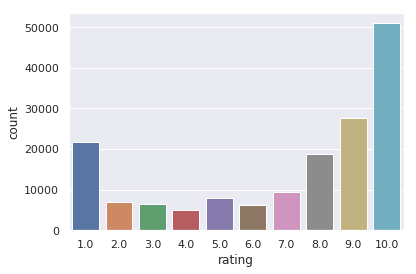

rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64


In [146]:
# Plot the counts of each ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=train_df)
plt.show()
print(train_df.groupby(['rating']).size())

In [147]:
# Categorize the columns `drugName` and `condition`

train_df['drugName'] = train_df['drugName'].astype('category')
train_df['condition'] = train_df['condition'].astype('category')

cat_columns = train_df.select_dtypes(['category']).columns
train_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)

print(train_df.shape)
print(train_df.head())
print(train_df.describe())

(161297, 4)
   drugName  condition                                             review  \
0      3203        466  "It has no side effect, I take it in combinati...   
1      1431         73  "My son is halfway through his fourth week of ...   
2      1854        165  "I used to take another oral contraceptive, wh...   
3      2285        165  "This is my first time using any form of birth...   
4       516        574  "Suboxone has completely turned my life around...   

   rating  
0     9.0  
1     8.0  
2     5.0  
3     8.0  
4     9.0  
            drugName      condition         rating
count  161297.000000  161297.000000  161297.000000
mean     1706.315610     356.111440       6.994377
std       942.790948     236.961905       3.272329
min         0.000000      -1.000000       1.000000
25%       988.000000     165.000000       5.000000
50%      1748.000000     262.000000       8.000000
75%      2449.000000     563.000000      10.000000
max      3435.000000     883.000000      10.0

從上面的 dataframe info 可以看到 `rating` 平均約為 7。但是 sentiment.ipynb 中 plot 的結果，覺得可以把 `rating` 5 也當作負面評論。因此以下分配 `polarity` 時，將劃分依據改為1-5分為負評(標記：-1), 6-7分為中性評論(標記：0), 8-10分為好評(標記：1)。重新劃分完後，plot 出 training, testing data 的各個 `polarity` 數量。

    rating polarity
0      9.0        1
1      8.0        1
2      5.0       -1
3      8.0        1
4      9.0        1
5      2.0       -1
6      1.0       -1
7     10.0        1
8      1.0       -1
9      8.0        1
10     9.0        1
11    10.0        1
12     4.0       -1
13     4.0       -1
14     3.0       -1
15     9.0        1
16     9.0        1
17     9.0        1
18    10.0        1
19    10.0        1
20     8.0        1
21    10.0        1
22     9.0        1
23    10.0        1
24     1.0       -1
25     7.0        0
26    10.0        1
27    10.0        1
28     6.0        0
29     8.0        1

training data:


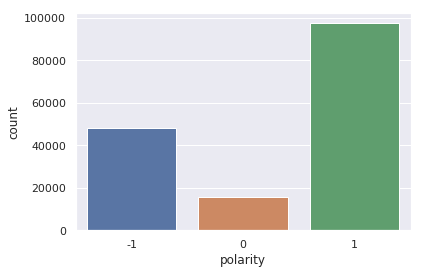

testing data:


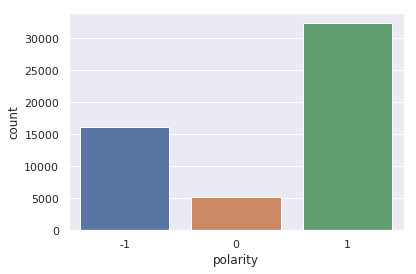

In [148]:
# Define `polarity`

train_df['polarity'] = pd.cut(train_df['rating'], bins=[-1, 5, 7, 10], labels=[-1, 0, 1])
test_df['polarity'] = pd.cut(test_df['rating'], bins=[-1, 5, 7, 10], labels=[-1, 0, 1])

print(train_df[['rating', 'polarity']].head(30))


# Plot the counts of each `polarity`

print('\ntraining data:')
plt.figure()
sns.set()
ax = sns.countplot(x="polarity", data=train_df)
plt.show()

print('testing data:')
plt.figure()
sns.set()
ax = sns.countplot(x="polarity", data=test_df)
plt.show()

從原本的文字內容可以看到其中夾雜很多跳脫字元、藥物及症狀專有名詞等，可能影響計算詞頻，所以利用regex及先前建立的drugSet去除這些字。從原本的 baseline.ipynb 中印出資料corpus中前幾百個詞會發現都是數字跟符號，因此這邊再多過濾掉底線('_')等符號及數字。也用 nltk 的 PorterStemmer 取出字根，再做 word count，希望減少 corpus(feature)數量，也避免因為英文字的變化形被辨認為不同單字而影響訓練結果。

In [149]:
# Text cleaning

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm

tqdm.pandas()

REPLACE_NO_SPACE = re.compile("[.;:!ツ_\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

stopWords = set(stopwords.words('english'))

def filter_stopwords(sentence):
    sentence = sentence.replace("&#039;", "'")
    sentence = sentence.lower()
    
    sentence = REPLACE_NO_SPACE.sub("", sentence)
    sentence = REPLACE_WITH_SPACE.sub(" ", sentence)
    sentence = re.sub("\d+", "", sentence)
    
    words = word_tokenize(sentence)
    wordsFiltered = []
    for w in words:
        #w_lemma = lemmatizer.lemmatize(w)
        w_lemma = stemmer.stem(w)
        if (w_lemma not in stopWords) and (w_lemma not in drugSet):
            wordsFiltered.append(w_lemma)
    joinStr = " "
    return joinStr.join(wordsFiltered)


print('before cleaning:\n')
print(train_df['review'].head().values)

train_df['review'] = train_df['review'].progress_apply(filter_stopwords)
test_df['review'] = test_df['review'].progress_apply(filter_stopwords)

print('\nafter cleaning:\n')
print(train_df['review'].head().values)

  0%|          | 27/161297 [00:00<10:07, 265.62it/s]

before cleaning:

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'
 '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it

100%|██████████| 53766/53766 [02:52<00:00, 311.53it/s]


after cleaning:

['ha side effect take combin mg fish oil'
 'son halfway hi fourth week becam concern began thi last week start take highest dose two day could hardli get bed wa veri cranki slept nearli hour drive home school vacat veri unusu call hi doctor monday morn said stick day see school get morn last two day problem free much agreeabl ever less emot good thing less cranki rememb thing overal hi behavior better tri mani differ medic far thi effect'
 'use take anoth oral contracept pill cycl wa veri happi veri light period max day side effect contain hormon gestoden avail us switch becaus ingredi similar pill end start immedi first day period instruct said period last two week take second pack two week third pack thing got even wors third period last two week end third week still daili brown discharg posit side didnt ani side effect idea period free wa tempt ala'
 'thi first time use ani form birth control glad went patch month first decreas libido subsid onli downsid made perio

plot 出每個評論的長度會發現有少數幾十個長度超過1000字的評論，從 dataframe info 也可以看到平均評論長度只有200字左右，最長的評論卻有多達近6000字，因此也將過長的評論過濾掉，避免訓練時因為這些少數較密集的資料造成訓練結果偏差。

before filter:

            drugName      condition         rating  commentLength
count  161297.000000  161297.000000  161297.000000  161297.000000
mean     1706.315610     356.111440       6.994377     239.896470
std       942.790948     236.961905       3.272329     130.128886
min         0.000000      -1.000000       1.000000       0.000000
25%       988.000000     165.000000       5.000000     135.000000
50%      1748.000000     262.000000       8.000000     236.000000
75%      2449.000000     563.000000      10.000000     354.000000
max      3435.000000     883.000000      10.000000    5750.000000
(161297, 6)


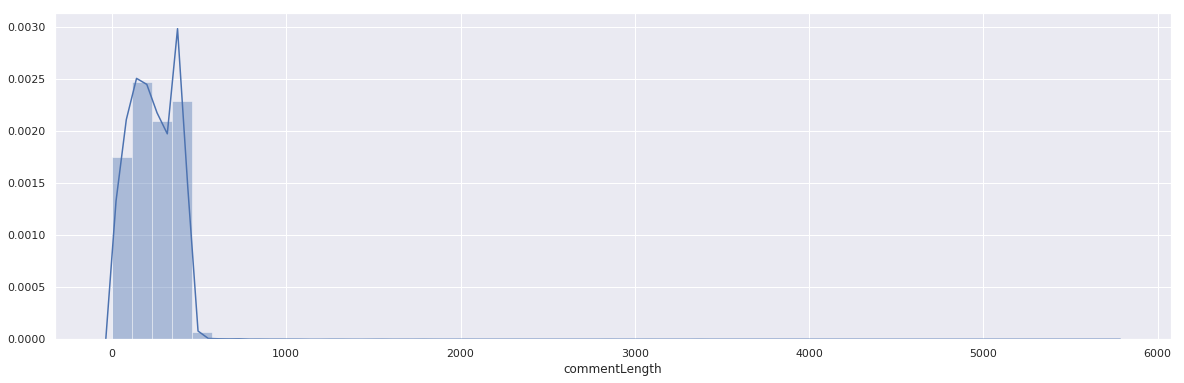


after filter:

            drugName      condition         rating  commentLength
count  161220.000000  161220.000000  161220.000000  161220.000000
mean     1706.222417     356.133029       6.994529     239.255204
std       942.787059     236.974738       3.272155     125.781068
min         0.000000      -1.000000       1.000000       0.000000
25%       988.000000     165.000000       5.000000     135.000000
50%      1748.000000     262.000000       8.000000     236.000000
75%      2449.000000     563.000000      10.000000     354.000000
max      3435.000000     883.000000      10.000000     996.000000
(161220, 6)


In [150]:
# Plot comment length

train_df['commentLength'] = train_df['review'].apply(lambda x: len(x))
print('before filter:\n')
print(train_df.describe())
print(train_df.shape)

plt.figure(figsize=(20, 6))
sns.set()
ax = sns.distplot( train_df["commentLength"] )
plt.show()


# Filter the data by comment length

train_df = train_df[ (train_df.commentLength < 1000) ]
print('\nafter filter:\n')
print(train_df.describe())
print(train_df.shape)

feature 一樣使用 sklearn 的 TfidfTransformer 計算 tf-idf值。

In [188]:
# calculate word count & tf-idf

from sklearn.feature_extraction.text import TfidfTransformer    
from sklearn.feature_extraction.text import CountVectorizer
import datetime

print(datetime.datetime.now())
print('\n')

vectorizer = CountVectorizer(max_features=60000, ngram_range=(1,2))  
transformer = TfidfTransformer()  

vectorizer.fit(train_df['review'])
data_train_x_count = vectorizer.transform(train_df['review'])
data_test_x_count = vectorizer.transform(test_df['review'])

transformer.fit(data_train_x_count)
data_train_x = transformer.transform(data_train_x_count)
data_test_x = transformer.transform(data_test_x_count)

print('\ntraining data shape:')
print(data_train_x.shape)
print(type(data_train_x))

print('\n')
print(datetime.datetime.now())

2019-05-16 07:16:39.681685



training data shape:
(161220, 60000)
<class 'scipy.sparse.csr.csr_matrix'>


2019-05-16 07:17:38.330787


印出訓練資料 corpus 中前100個字可以看到數字都被過濾掉了，雖然看起來還是有一些沒有意義的字或錯字。

In [189]:
# Print words in corpus

print(datetime.datetime.now())
print('\n')
  
words = vectorizer.get_feature_names()  
print('corpus size:')
print(len(words))
print('\n')

print('first 100 words in corpus:')
showNum = 100
countNum = 0
for word in words:
    print(word)
    countNum += 1
    if(countNum == showNum):
        break

print('\n')
print(datetime.datetime.now())

2019-05-16 07:17:38.342018


corpus size:
60000


first 100 words in corpus:
aa
aa meet
aarp
ab
abandon
abat
abcess
abdomen
abdomen area
abdomen wa
abdomin
abdomin area
abdomin back
abdomin bloat
abdomin cramp
abdomin discomfort
abdomin nausea
abdomin sever
abdomin surgeri
abdomin wa
abil
abil concentr
abil control
abil focu
abil function
abil get
abil orgasm
abil sleep
abil think
abil walk
abil work
abit
abl
abl achiev
abl activ
abl actual
abl afford
abl anyth
abl befor
abl breath
abl carri
abl clean
abl clear
abl come
abl complet
abl concentr
abl continu
abl control
abl cope
abl cut
abl deal
abl decreas
abl drink
abl drive
abl drop
abl eat
abl enjoy
abl exercis
abl fall
abl feel
abl final
abl find
abl finish
abl focu
abl function
abl get
abl give
abl go
abl handl
abl help
abl hold
abl keep
abl leav
abl let
abl live
abl loos
abl lose
abl maintain
abl make
abl manag
abl move
abl normal
abl orgasm
abl pass
abl perform
abl play
abl put
abl quit
abl reduc
abl relax
abl rememb
abl rest
abl

## Models

In [190]:
# Logistic Regression

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print(datetime.datetime.now())
print('\n')

print('--- Logistic Regression ---\n')

lr_model = LogisticRegression(max_iter=500, C=100)
lr_model.fit(data_train_x, train_df['polarity'])

lr_predict_train_y = lr_model.predict(data_train_x)
print('training accuracy:')
print(accuracy_score(train_df['polarity'], lr_predict_train_y))

lr_predict_test_y = lr_model.predict(data_test_x)
print('\ntesting accuracy:')
print(accuracy_score(test_df['polarity'], lr_predict_test_y))

print('\nprecision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_df['polarity'], lr_predict_test_y, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
cm_lr = confusion_matrix(test_df['polarity'], lr_predict_test_y)
print(cm_lr)

print('\n')
print(datetime.datetime.now())

2019-05-16 07:17:38.919010


--- Logistic Regression ---

training accuracy:
0.9949447959310259

testing accuracy:
0.881653833277536

precision, recall, fbeta-score:
(0.8792942908207612, 0.881653833277536, 0.880082735014193, None)

confusion matrix(tn, fp, fn, tp):
[[14067   478  1662]
 [  723  3267  1220]
 [ 1517   763 30069]]


2019-05-16 07:19:29.057339


In [191]:
# SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

print(datetime.datetime.now())
print('\n')

print('--- SVC ---\n')


# Normalize data

scaler = StandardScaler(with_mean=False)
scaler.fit(data_train_x)

train_normalize = scaler.transform(data_train_x)
test_normalize = scaler.transform(data_test_x)


# Fit & predict

svc_model = SVC(kernel='linear', max_iter=10, C=30, tol=1e-6)
svc_model.fit(train_normalize, train_df['polarity'])

svc_predict_train_y = svc_model.predict(train_normalize)
print('training accuracy:')
print(accuracy_score(train_df['polarity'], svc_predict_train_y))

svc_predict_test_y = svc_model.predict(test_normalize)
print('\ntesting accuracy:')
print(accuracy_score(test_df['polarity'], svc_predict_test_y))

print('\nprecision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_df['polarity'], svc_predict_test_y, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
cm_svc = confusion_matrix(test_df['polarity'], svc_predict_test_y)
print(cm_svc)

print('\n')
print(datetime.datetime.now())

2019-05-16 07:19:29.072642


--- SVC ---

training accuracy:
0.6041061902989704

testing accuracy:
0.6016999590819477

precision, recall, fbeta-score:
(0.5836976059053537, 0.6016999590819477, 0.4524366896017032, None)

confusion matrix(tn, fp, fn, tp):
[[    7     2 16198]
 [    2     4  5204]
 [    2     7 32340]]


2019-05-16 07:19:36.214216


In [192]:
# count - naive bayes

from sklearn.naive_bayes import MultinomialNB

print(datetime.datetime.now())
print('\n')

print('--- MultinomialNB - word count ---\n')

nb_model = MultinomialNB()
nb_model.fit(data_train_x_count, train_df['polarity'])

nb2_predict_train_y = nb_model.predict(data_train_x_count)
print('training accuracy:')
print(accuracy_score(train_df['polarity'], nb2_predict_train_y))

nb2_predict_test_y = nb_model.predict(data_test_x_count)
print('\ntesting accuracy:')
print(accuracy_score(test_df['polarity'], nb2_predict_test_y))

print('\nprecision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_df['polarity'], nb2_predict_test_y, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
cm_nb = confusion_matrix(test_df['polarity'], nb2_predict_test_y)
print(cm_nb)

print('\n')
print(datetime.datetime.now())

2019-05-16 07:19:36.232499


--- MultinomialNB - word count ---

training accuracy:
0.7879357399826324

testing accuracy:
0.7471822341256557

precision, recall, fbeta-score:
(0.7543804253093968, 0.7471822341256557, 0.750546305755909, None)

confusion matrix(tn, fp, fn, tp):
[[11636  1409  3162]
 [ 1239  2011  1960]
 [ 3243  2580 26526]]


2019-05-16 07:19:36.784867


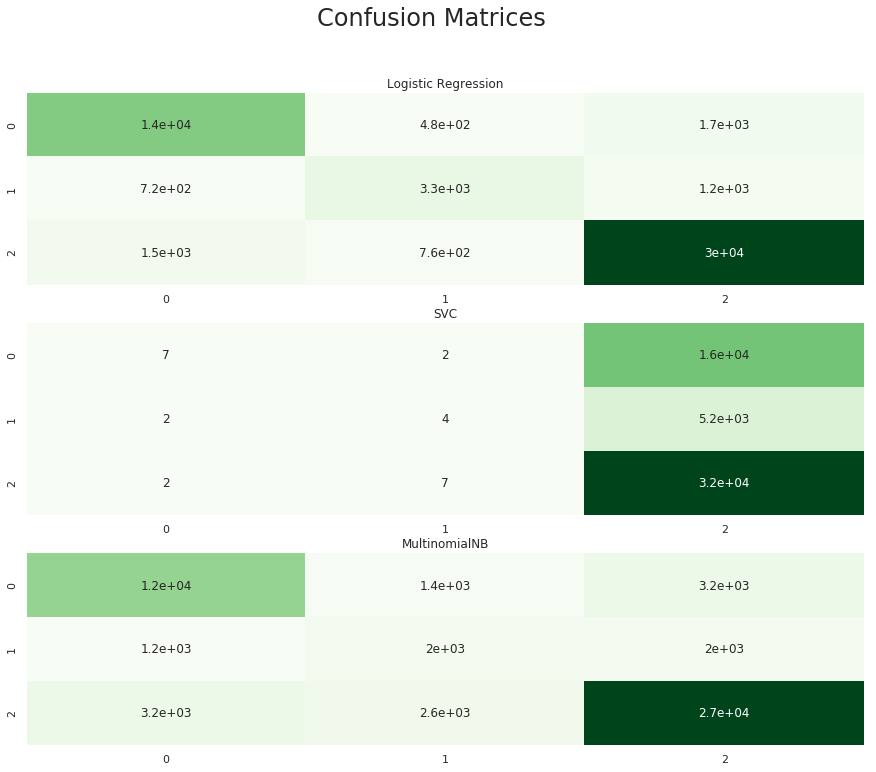

In [193]:
plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(3,1,1)
plt.title("Logistic Regression")
sns.heatmap(cm_lr, annot = True, cmap="Greens",cbar=False);

plt.subplot(3,1,2)
plt.title("SVC")
sns.heatmap(cm_svc, annot = True, cmap="Greens",cbar=False);

plt.subplot(3,1,3)
plt.title("MultinomialNB")
sns.heatmap(cm_nb, annot = True, cmap="Greens",cbar=False);

## Improvement

一開始前處理只多做了stemming, 移除數字、特殊字元等，以及調整了model的參數、改變正負評的劃分，但是結果跟 baseline.ipynb 比較起來，幾乎沒什麼進步，可能這些更動影響的部份都不多，而且 feature 很稀疏，可能被少數 tf-idf 特別大的值給影響，多做的這些更動不太會影響到訓練過程。後來也發現調整模型參數的時候對accuracy之類的影響還比較大。最後試著調整countVectorizer的參數，像是`max_features`，往下調過30000, 10000，但這個調小之後accuracy也跟著變小了，可能這樣反而把一些重要的、比較能代表正負面但是出現次數較少的字給過濾掉，所以結果變差了。但是調整ngram_range時，發現 logistic regression 和 multinomialNB 的結果都變好了，而且 logistic regression 的 accuracy 上升超級多!! ngram果然很重要QQ，才不會把一些合在一起才有完整意義的字給斷掉了。